<a href="https://colab.research.google.com/github/difurka/mlbookcamp_learning/blob/main/mlzoomcamp_hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-24 03:05:29--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-10-24 03:05:30 (18.6 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('/content/housing.csv')

In [54]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [55]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.replace(' ', '_')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


# Preparing the dataset


In [56]:
df = df[(df['ocean_proximity'] == '<1h_ocean') | (df['ocean_proximity'] == 'inland')]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [58]:
df = df.fillna(0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15687 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
 9   ocean_proximity     15687 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [60]:
df.ocean_proximity.value_counts()

<1h_ocean    9136
inland       6551
Name: ocean_proximity, dtype: int64

In [61]:
df['log_median_house_v'] = np.log1p(df['median_house_value'])


<Axes: xlabel='median_house_value', ylabel='Count'>

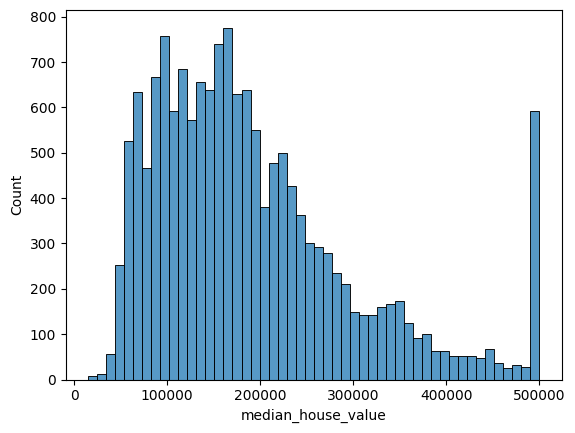

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df.median_house_value, bins=50)

<Axes: xlabel='log_median_house_v', ylabel='Count'>

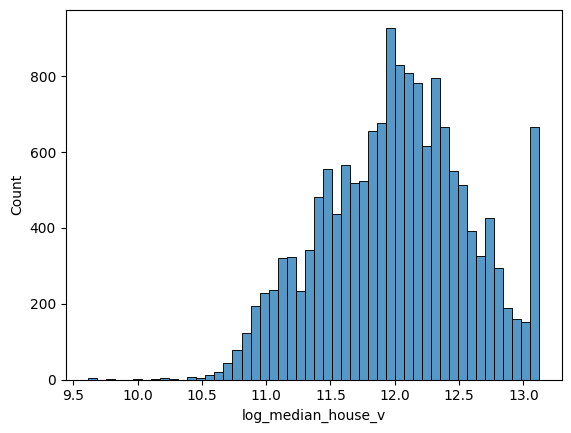

In [63]:
sns.histplot(df.log_median_house_v, bins=50)

In [64]:
del df['median_house_value']

In [65]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.log_median_house_v.values
y_val = df_val.log_median_house_v.values
y_test = df_test.log_median_house_v.values

del df_train['log_median_house_v']
del df_val['log_median_house_v']
del df_test['log_median_house_v']
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [82]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=True)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1h_ocean',
       'ocean_proximity=inland', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

In [79]:
X_train

<9411x10 sparse matrix of type '<class 'numpy.float64'>'
	with 84699 stored elements in Compressed Sparse Row format>

In [68]:
y_train

array([11.80634853, 12.68168862, 11.61187447, ..., 11.46374572,
       11.93032573, 10.92054627])

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [89]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1h_ocean <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1h_ocean >  0.50
|   |--- value: [12.30]



## 1) ocean_proximity

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)


train_dict = df_val.to_dict(orient='records')
X_val = dv.fit_transform(train_dict)

y_pred = rf.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
rmse

0.244910835217013

## 2) 0.245

In [101]:
def rand_for(n):
  rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_val)
  rmse = mean_squared_error(y_val, y_pred, squared=False)
  print(f'{n} ->> {round(rmse,3)}')

for i in range(10, 201, 10):
  rand_for(i)


10 ->> 0.245
20 ->> 0.238
30 ->> 0.236
40 ->> 0.235
50 ->> 0.234
60 ->> 0.234
70 ->> 0.234
80 ->> 0.234
90 ->> 0.234
100 ->> 0.234
110 ->> 0.234
120 ->> 0.234
130 ->> 0.234
140 ->> 0.234
150 ->> 0.233
160 ->> 0.233
170 ->> 0.233
180 ->> 0.234
190 ->> 0.234
200 ->> 0.234


## 3) 10 ->> 0.245

In [104]:
scores = []

for d in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        auc = mean_squared_error(y_val, y_pred, squared=False)

        scores.append((d, n, auc))

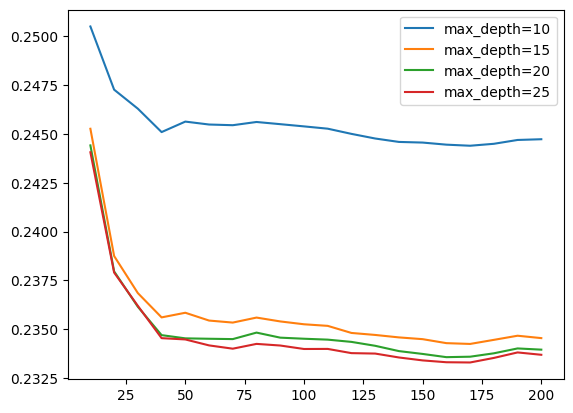

In [106]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

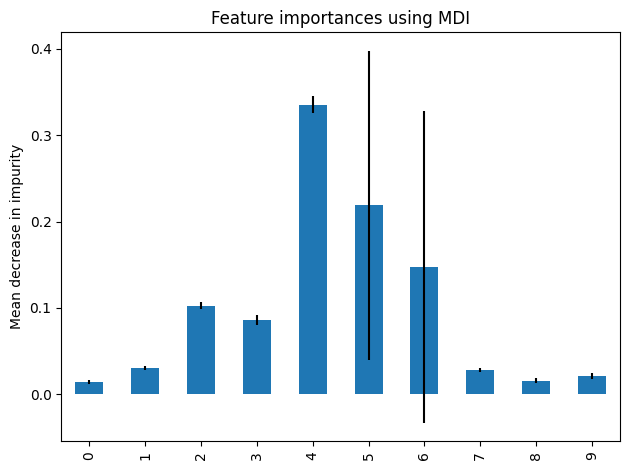

In [111]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

import pandas as pd
import numpy as np

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
importances
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## 5) median_income

In [112]:
!pip install xgboost

In [113]:
import xgboost as xgb

In [125]:
# features = dv.get_feature_names_out()
# features[5] = 'ocean_proximity=1h_ocean'
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=list(features))
dval = xgb.DMatrix(X_val, label=y_val, feature_names=list(features) )

In [121]:
 list(features)

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1h_ocean',
 'ocean_proximity=inland',
 'population',
 'total_bedrooms',
 'total_rooms']

In [126]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [128]:
y_pred = model.predict(dval)
auc = mean_squared_error(y_val, y_pred, squared=False)

In [129]:
auc

0.228623199980106

In [131]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)
y_pred = model.predict(dval)
auc = mean_squared_error(y_val, y_pred, squared=False)
auc

0.23208927121609343

## 6) 0.1